In [1]:
# ------- Data Extraction and Preparation ------- #

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# ---------- visualization libraries -----------

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go  
import plotly.tools as tls  
import plotly.figure_factory as ff  
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

#Extract the data from train.csv into Xy_train
data = pd.read_csv('Telco-Customer-Churn.csv', engine='python')

# Find and Remove all the data with empty string 
data.replace(' ', np.nan, inplace=True)
data.isnull().sum() # TotalCharges - 11
data = data.dropna()






/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64


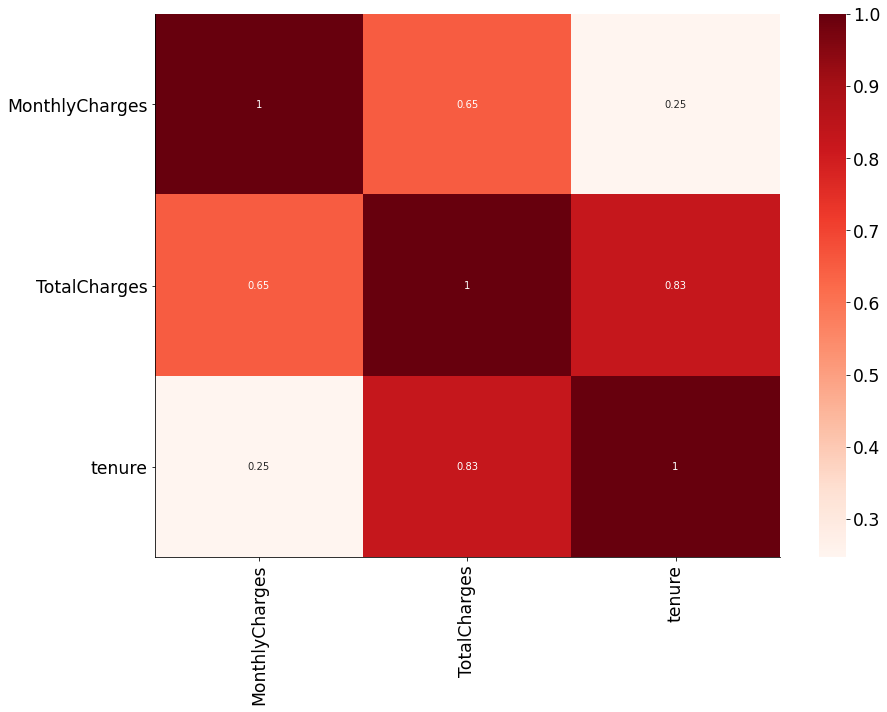

In [55]:
# --------------------- CORRELATIONS BETWEEN NUMERIC FEATURES (FIGURE 1) --------------------- #
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


numeric_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')

numeric = data[[*numeric_features]]

print(data['tenure'])

corr = numeric.corr()
g = sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
sns.despine()
g.figure.set_size_inches(14,10)

    
plt.show()



      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
5     9305-CDSKC  Female              0  ...          99.65       820.50    Yes
8     7892-POOKP  Female              0  ...         104.80      3046.05    Yes
13    0280-XJGEX    Male              0  ...         103.70      5036.30    Yes
...          ...     ...            ...  ...            ...          ...    ...
7021  1699-HPSBG    Male              0  ...          59.80       727.80    Yes
7026  8775-CEBBJ  Female              0  ...          44.20       403.35    Yes
7032  6894-LFHLY    Male              1  ...          75.75        75.75    Yes
7034  0639-TSIQW  Female              0  ...         102.95      6886.25    Yes
7041  8361-LTMKD    Male              1  ...          74.40       306.60    Yes

[1869 rows x 21 columns]


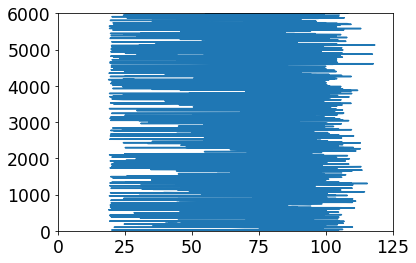

In [53]:
# --------------------- RELATIONSHIP CHURN AND NUMERIC FEATURES (FIGURE 2) --------------------- #

'''
data2 = data.loc[data['Churn'] == 'Yes']
data3 = data.loc[data['Churn'] == 'No']
print(data2)

# switch axis 

Monthly = data2['MonthlyCharges'].plot.line()

# switch axis:
# get data from first line of the plot
newx = Monthly.lines[0].get_ydata()
newy = Monthly.lines[0].get_xdata()

Monthly.set_xlim([0, 125])
Monthly.set_ylim([0,6000])

# set new x- and y- data for the line
Monthly.lines[0].set_xdata(newx)
Monthly.lines[0].set_ydata(newy)

'''


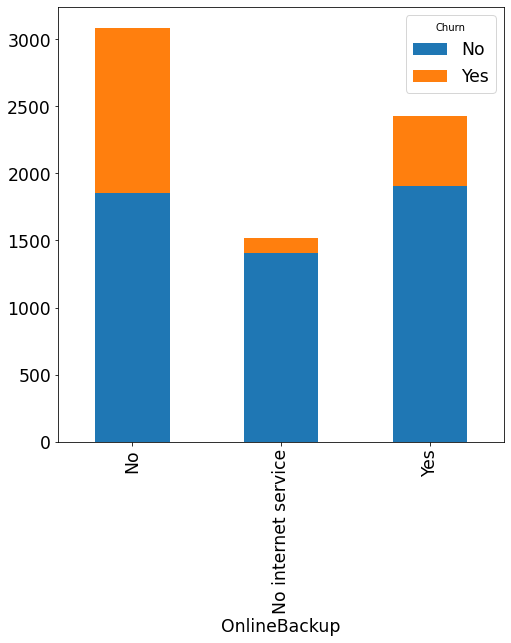

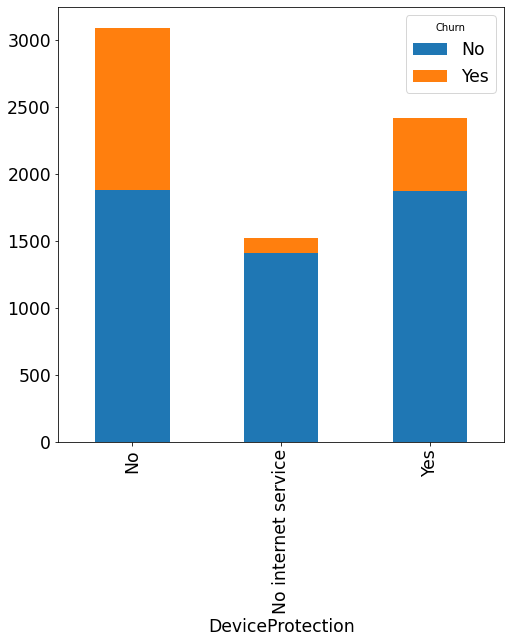

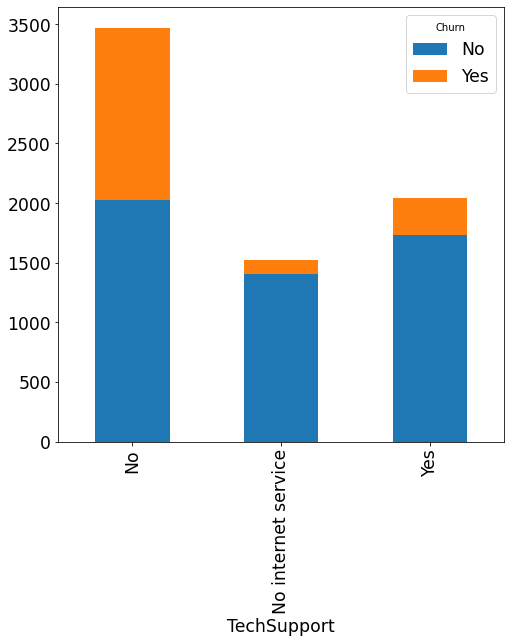

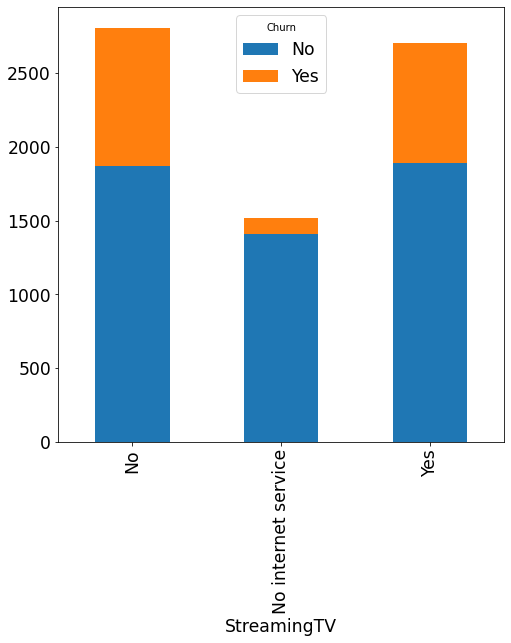

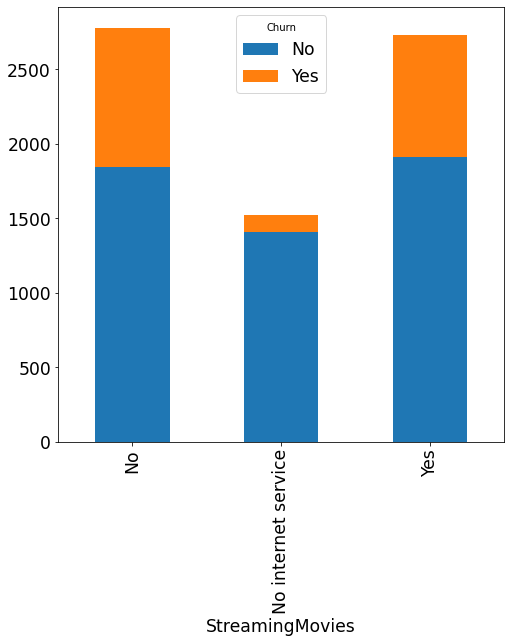

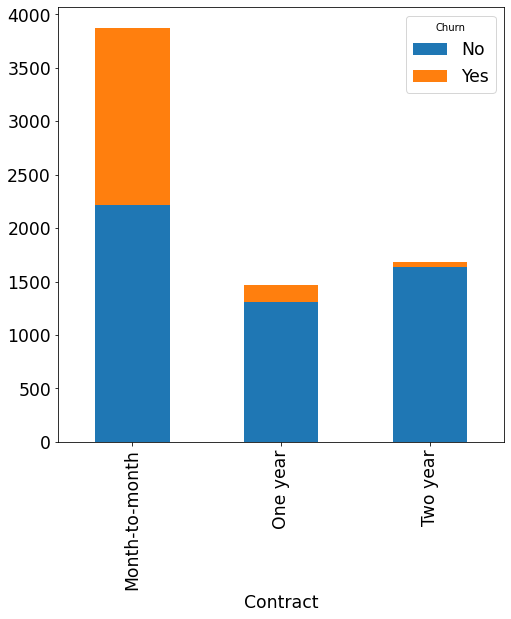

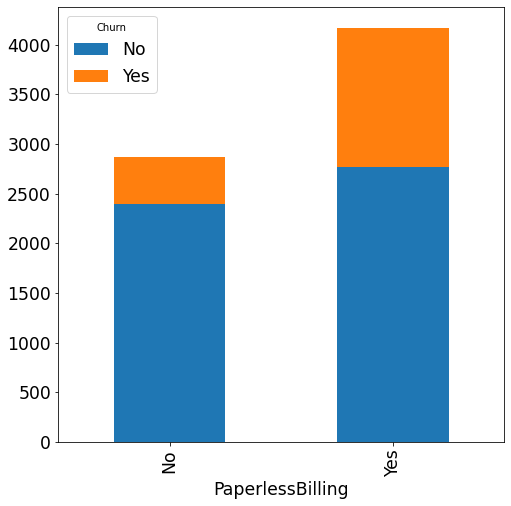

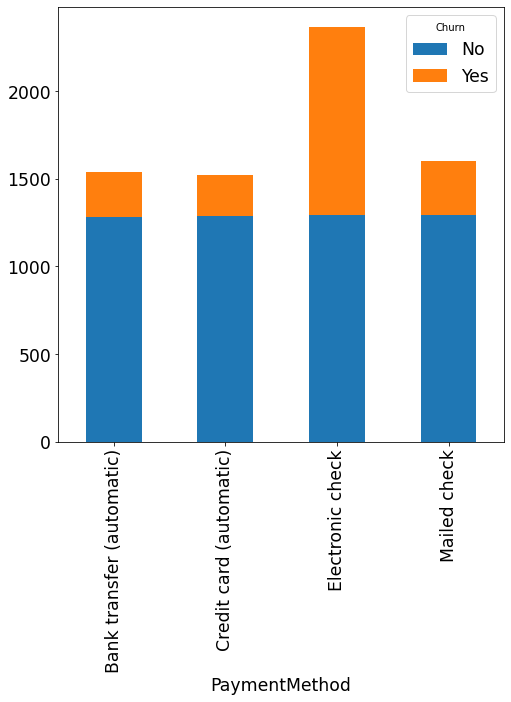

In [50]:
# --------------------- RELATIONSHIP CHURN AND CATEGORICAL FEATURES (FIGURE 3 & 4) --------------------- #

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


'''
# GENDER
Gender = pd.crosstab(index=data["gender"], 
                          columns=data["Churn"])

Gender.plot(kind="bar", 
                 figsize=(8,8),
             stacked=True)

# SENIOR CITIZEN
Senior = pd.crosstab(index=data["SeniorCitizen"], 
                          columns=data["Churn"])

Senior.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


# PARTNER
Partner = pd.crosstab(index=data["Partner"], 
                          columns=data["Churn"])

Partner.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# DEPENDENTS
Dependents = pd.crosstab(index=data["Dependents"], 
                          columns=data["Churn"])

Dependents.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


# PHONE SERVICE
PhoneService = pd.crosstab(index=data["PhoneService"], 
                          columns=data["Churn"])

PhoneService.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# MULTIPLE LINES
MultipleLines = pd.crosstab(index=data["MultipleLines"], 
                          columns=data["Churn"])

MultipleLines.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)               

# INTERNET SERVICE
InternetService = pd.crosstab(index=data["InternetService"], 
                          columns=data["Churn"])

InternetService.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


# ONLINE SECURITY
OnlineSecurity = pd.crosstab(index=data["OnlineSecurity"], 
                          columns=data["Churn"])

OnlineSecurity.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


# TENURE
tenure = pd.crosstab(index=telcom["tenure"], 
                          columns=telcom["Churn"])

tenure.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )
'''

# OnlineBackup
OnlineBackup = pd.crosstab(index=telcom["OnlineBackup"], 
                          columns=telcom["Churn"])

OnlineBackup.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# DeviceProtection
DeviceProtection = pd.crosstab(index=telcom["DeviceProtection"], 
                          columns=telcom["Churn"])

DeviceProtection.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# TechSupport
TechSupport = pd.crosstab(index=telcom["TechSupport"], 
                          columns=telcom["Churn"])

TechSupport.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )


# StreamingTV
StreamingTV = pd.crosstab(index=telcom["StreamingTV"], 
                          columns=telcom["Churn"])

StreamingTV.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# StreamingMovies
StreamingMovies = pd.crosstab(index=telcom["StreamingMovies"], 
                          columns=telcom["Churn"])

StreamingMovies.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# Contract
Contract = pd.crosstab(index=telcom["Contract"], 
                          columns=telcom["Churn"])

Contract.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# PaperlessBilling
PaperlessBilling = pd.crosstab(index=telcom["PaperlessBilling"], 
                          columns=telcom["Churn"])

PaperlessBilling.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )

# PaymentMethod
PaymentMethod = pd.crosstab(index=telcom["PaymentMethod"], 
                          columns=telcom["Churn"])

PaymentMethod.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True
              )







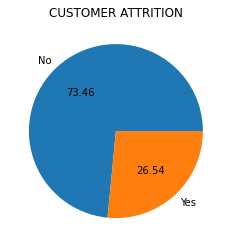

In [0]:
# --------------------- CUSTOMER ATTRITION  --------------------- #

#values
val = telcom["Churn"].value_counts().values.tolist()

labels = ["No", "Yes"]

plt.pie(val, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.title("CUSTOMER ATTRITION")
plt.show()
